In [1]:
import csv
# import the pandas library
import json
#import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# tweetRepliesData=pd.read_csv('TweetExtraction\cleaned_tweet_with_replies_only.csv')
tweetList=list()
with open("data\cleaned_tweet_with_replies_only.json",encoding="UTF-8") as tweetData:
    print(tweetData)
    tweetList=json.load(tweetData)
print(tweetList)
    

In [3]:
#Return list of tweet replies
def render_reply_list(tweet):
    replies=tweet['replies']
    # data=replies['data']
    res = json.loads(replies)
    # print(type(res))
    # print(res['data'])
    return res['data']


In [4]:
import requests
#map each tweet replies with its corresponding classification
def classify_tweet_replies(replies):
    reply_with_sentiment_analyzis_list=list()
    
    for reply in replies:
        url = "http://localhost/predict-review?review="+reply['text']

        payload = ""
        headers = {}

        response = requests.request("GET", url, headers=headers, data=payload)
        reply_with_sentiment_dict={"reply":reply['text'],"classification":response.text}
        reply_with_sentiment_analyzis_list.append(reply_with_sentiment_dict)
        
    #     print(reply['text'])
    #     print(response.text) print("*"*50)
    
    # print(reply_with_sentiment_analyzis_list)
    # print("*"*50)
    return reply_with_sentiment_analyzis_list
        
        
    
    

In [5]:
print(type(tweetList))
print(type(tweetList[1]['replies']))

<class 'list'>
<class 'str'>


In [6]:
print(type(render_reply_list(tweetList[1])))

<class 'list'>


In [7]:
new_tweet_dictionary_list=list(dict())
for tweet in tweetList:
    
   classification=classify_tweet_replies(render_reply_list(tweet))
   new_tweet_dictionary_list.append({"tweet":tweet['text'],"attachement":tweet['attachments'],"analysis":classification})
# print(new_tweet_dictionary_list)
# json.dump(new_tweet_dictionary_list)   


In [ ]:
# convert into json
final_data = json.dumps(new_tweet_dictionary_list, indent=2)
print(final_data)

In [9]:

# convert into json
# file name is mydata
print(type(final_data))
with open("data/my_analyzed_data.json", "w") as jsonFile:
   json.dump(new_tweet_dictionary_list,jsonFile)
    
  


<class 'str'>


In [10]:
#data visualization for distribution
def mapReplyWithItsClass(tweetList):
    repliesWithClassList=list()
    for tweet in tweetList:
        
        analysis=tweet['analysis']
        for each_reply_analyzis in analysis:
            reply=each_reply_analyzis['reply']
            reply_class=each_reply_analyzis['classification']
            #print(type(reply_class))
            reply_class = json.loads(reply_class)
           # print(reply_class['prediction'])
            reply_with_class_dict={"reply":reply,"group":reply_class['prediction']}
            repliesWithClassList.append(reply_with_class_dict)
            
    return repliesWithClassList
    


In [11]:
repliesWithClassList=mapReplyWithItsClass(new_tweet_dictionary_list)


In [12]:
with open("data/tweet_replies_distribution.json", "w") as jsonFile:
   json.dump(repliesWithClassList,jsonFile)

In [13]:
# warnings.filterwarnings("ignore")
# # seeding
# np.random.seed(123)
import pandas as pd
data = pd.read_csv('data/tweet_replies_distribution.csv')
categories = ['Positive','Neutral','Negative']
# data.head()
# len(data)
data.isnull().any().any()
data.isnull().any()
data = data.dropna(subset=['reply','group'])
# data['clean_text','category'].isnull().sum()
# data.isnull().any().any()
# data.isnull().any()
data.isnull().any()

reply    False
group    False
dtype: bool

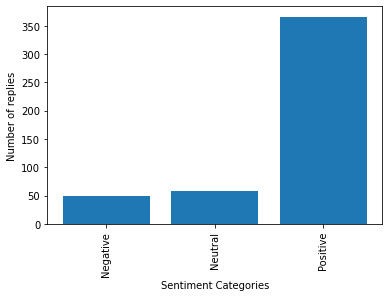

,reply
group,
Negative,50
Neutral,59
Positive,366


In [14]:
def visualize():
    category_count = data.groupby('group').count()
    plt.bar(category_count.index.values, category_count["reply"])
    plt.xticks(rotation='vertical')
    plt.xlabel('Sentiment Categories')
    plt.ylabel('Number of replies')
    plt.show()
    return category_count
visualize()

In [ ]:
print(mapReplyWithItsClass(new_tweet_dictionary_list))